# NCSU 2022 Summer I Term ST590 Project 1
## Joshua Baber and Muhammer Kurt

## Introduction

The purpose of this report is to analyze data that was collected on used motorcycles using graphical and tabular representations and then making predictions for the selling price of a motorcycle.  We will use two algorithms to make predictions, one with a grid search and the other with a gradient descent.  Each of the algorithms uses two methods to make predictions, one that just uses the selling price from the data, and the other that uses both the selling price and kilometers driven from the data.

In [1]:
import pandas as pd
bikedata = pd.read_csv("C:/Users/squas/OneDrive/Desktop/ST 590/Code/Data/bikeDetails.csv")
bikedata.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


We used the `matplotlib` and `pandas` modules for tables and graphical representations in the EDA part.  We used the `pandas`, `numpy`, and `math` modules for the algorithms in the second part.

## 1. Exploratory Data Analysis

Let's first see the data types for the variables in our bikedata data set.  We see that the categorical variables were saved as objects.

In [2]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


Next, we can see the statistical summary for the selling_price variable.  This will return the length, mean, standard deviation, and five number summary.

In [3]:
bikedata.selling_price.describe()

count      1061.000000
mean      59638.151744
std       56304.291973
min        5000.000000
25%       28000.000000
50%       45000.000000
75%       70000.000000
max      760000.000000
Name: selling_price, dtype: float64

Now we need to change the categorical variables into "category type" variables.  We use a lambda function to do that.

In [4]:
# Create a list of the variables to make the category type
categorical_variables = ["name", "seller_type", "owner"]

# Use the lambda function to apply the .astype() method to our list
categorical_variables_in_bikedata = \
bikedata[categorical_variables].apply(lambda column: column.astype("category"))

# Check that they are category type
categorical_variables_in_bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   name         1061 non-null   category
 1   seller_type  1061 non-null   category
 2   owner        1061 non-null   category
dtypes: category(3)
memory usage: 14.9 KB


Let's make a scatter plot of selling price with another numeric variable.  We chose the km_driven variable as the second variable.  We see that most of the bikes in our data set were driven less than (approximately) 180,000 km and were sold at a price of up to (approximately) 220,000.  We can see that there are quite a few outliers outside of these ranges.

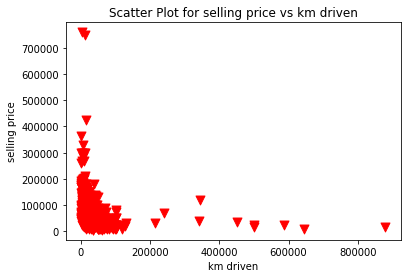

In [5]:
import matplotlib.pyplot as plt

# Create scatter plot of km_driven on x-axis and selling_price on y-axis
# Set some custom settings like color, size, and marker
bikedata.plot.scatter(x = "km_driven", y = "selling_price", s = 80, c = "Red", 
                      marker = "v")

# Give plot titles and labels
plt.title("Scatter Plot for selling price vs km driven")

plt.xlabel("km driven")

plt.ylabel("selling price")

plt.show()

plt.close()

Instead of having to look at the year column, it would be better to create a new column with the "age" values of each bike and see the correlation between the selling price and age.

In [6]:
# Create empty list to append the age values to
agevalues = []

# Loop through each value in the year columns
for i in range(0,1061):
    # Calculate the age j by subtracting the year i from 2020
    # (which is the year the data was collected)
    j = 2020 - bikedata.year[i]
    # Append the age value to our list agevalues
    agevalues.append(j)

# Add the column of the age values with the heading "age" 
bikedata["age"] = agevalues

# Let's see if it's okay
bikedata.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,age
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0,10
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0,8
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0,7
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0,11
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0,12


Okay, let's now see the statistical summary of all numerical variables in our data set with the `.describe()` method.  When we check the statistical summary of the numerical variables, we see that the selling_price and km_driven variables are so widely spread that they have big standard deviations which are close to and more than their mean values. It seems that the outliers play a significant role on those.

In [7]:
# Creating a list of the numerical variables in our data set
bikedata_numerical_variables = bikedata[["selling_price", "km_driven", 
                                         "ex_showroom_price", "age"]]
# Use the .describe() method to see the statistics
bikedata_numerical_variables.describe()

,selling_price,km_driven,ex_showroom_price,age
count,1061.000000,1061.000000,6.260000e+02,1061.000000
mean,59638.151744,34359.833176,8.795871e+04,6.132893
std,56304.291973,51623.152702,7.749659e+04,4.301191
min,5000.000000,350.000000,3.049000e+04,0.000000
25%,28000.000000,13500.000000,5.485200e+04,3.000000
50%,45000.000000,25000.000000,7.275250e+04,5.000000
75%,70000.000000,43000.000000,8.703150e+04,9.000000
max,760000.000000,880000.000000,1.278000e+06,32.000000


We created a correlation matrix for our numerical variables in bikedata using the `.corr()` method.  Intuitively, we should see a strong negative correlation between the "selling_price and km_driven" and "selling_price and age" pairs, but the correlation between them is quite weak. Perhaps the selling_price might be mostly related to the brand of the bike.

In [8]:
bikedata_numerical_variables.corr()

,selling_price,km_driven,ex_showroom_price,age
selling_price,1.000000,-0.212937,0.918583,-0.402188
km_driven,-0.212937,1.000000,-0.122011,0.288675
ex_showroom_price,0.918583,-0.122011,1.000000,-0.126378
age,-0.402188,0.288675,-0.126378,1.000000


Next, we subset the bikedata to see the "selling_price" and "owner" columns only using the `.iloc[]` method and indices.

In [9]:
selling_price_vs_owner = bikedata.iloc[:,[1, 4]]
# See the first few rows
selling_price_vs_owner.head()

,selling_price,owner
0,175000,1st owner
1,45000,1st owner
2,150000,1st owner
3,65000,1st owner
4,20000,2nd owner


We created a statistical summary table of selling_price grouped by how many owners the bikes have had.  The majority of the bikes were sold by their 1st owners. There are 3 bikes sold by their 4th owners with a higher mean selling price. Perhaps those three bikes were collector bikes which were purchased by their “fans” when their prices were more affordable for them, but that theory would require more research.

In [10]:
# Let's see the statistical summary of the selling_price grouped by the owner
selling_price_vs_owner.groupby("owner").describe()

selling_price                                                  \
                  count           mean            std      min      25%   
owner                                                                     
1st owner         924.0   60022.813853   51542.569711   5000.0  30000.0   
2nd owner         123.0   55666.658537   81671.923395   6000.0  25000.0   
3rd owner          11.0   55727.272727   38385.129697  20000.0  27500.0   
4th owner           3.0  118333.333333  183325.757419  10000.0  12500.0   

                                        
               50%       75%       max  
owner                                   
1st owner  45000.0   74250.0  760000.0  
2nd owner  32000.0   57500.0  750000.0  
3rd owner  45000.0   67500.0  150000.0  
4th owner  15000.0  172500.0  330000.0

Next we created a two-way contingency table for the "seller_type" and "owner" variables using the `pandas.crosstab()` function.  We see that the seller_type is overwhelmingly individuals with only 6 sales from dealers.  Of the sales from individuals, most were 1st owners by a large amount.

In [11]:
two_way_table_seller_type_owner = pd.crosstab(bikedata.seller_type,bikedata.owner)
# See the table now
two_way_table_seller_type_owner

owner,1st owner,2nd owner,3rd owner,4th owner
seller_type,,,,
Dealer,4,2,0,0
Individual,920,121,11,3


We created a side-by-side bar graph of our two-way contingency table of seller_type by owner using the `plot.bar()` method from pandas.

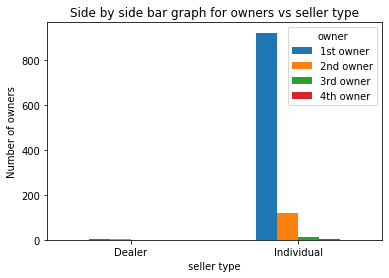

In [12]:
two_way_table_seller_type_owner.plot.bar()
# Create labels and title for the plot, also make the x tick labels horizontal
plt.xticks(rotation = 0)

plt.xlabel("seller type")

plt.ylabel("Number of owners")

plt.title("Side by side bar graph for owners vs seller type")

plt.show()

plt.close()

We wanted to categorize the bikes according to their ages using the `.cut()` from pandas.  We binned bikes into five categories and labeled them.

In [13]:
# Break the age variable into "new", "almost new", "moderate", "old", and "too old"
age_cut = pd.cut(bikedata.age, bins = [0, 1, 3, 5, 9,32], 
                 labels = ["new", "almost new", "moderate", "old", "too old"] )
# Check to see that it worked
age_cut

0              new
1       almost new
2       almost new
3         moderate
4              old
           ...    
1056       too old
1057           old
1058           old
1059       too old
1060       too old
Name: age, Length: 1061, dtype: category
Categories (5, object): ['new' < 'almost new' < 'moderate' < 'old' < 'too old']

We created a one-way contingency table for the age categories with the `.value_counts()` method.  We see that there are fewer new bikes than the other categories.  The other categories have 200-300 each.

In [14]:
age_cut.value_counts()

old           295
almost new    264
moderate      207
too old       206
new            86
Name: age, dtype: int64

Then we created a two-way contingency table for owner and age categories using the `.crosstab()` method from pandas.  There are many more 1st owner bikes for each age category, but there are more 2nd owner bikes for the "old" and "too old" categories.

In [15]:
owner_age_cut = pd.crosstab(bikedata.owner, age_cut)

owner_age_cut

age,new,almost new,moderate,old,too old
owner,,,,,
1st owner,85,250,178,247,161
2nd owner,1,13,28,44,37
3rd owner,0,1,1,3,6
4th owner,0,0,0,1,2


Lastly, we created a histogram showing the number of owners and their bikes' age categories using the `.hist()` method from pandas.  It seems that most of the first owners sold their bikes when their bikes are "almost new" or when their bikes are "old".

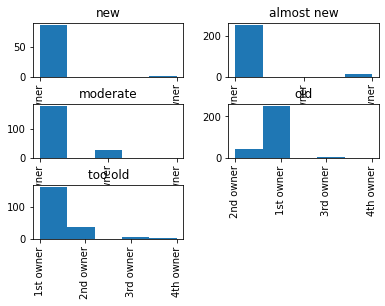

In [16]:
# We used bins = 5
bikedata.owner.hist(bins = 5, by = age_cut)

# Create title and labels
plt.title("Owner Type and Bike's Age Class")

plt.xlabel("bike age class")

plt.ylabel("owner numbers")

plt.show()

plt.close()

We created another histogram showing selling_price vs owner.  Majority of the bikes were sold by their 1st owners, then by their 2nd owners in the same price interval up to (and a little greater than) 200,000. 

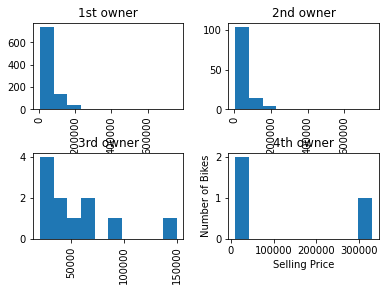

In [17]:
# Here we use bins = 10
bikedata.selling_price.hist(bins = 10, by = bikedata.owner)
# Create labels and title
plt.xticks(rotation = 0)
plt.xlabel("Selling Price")
plt.ylabel("Number of Bikes")
plt.show()
plt.close()

Our last histogram shows the selling price vs seller_type.  Almost all bikes were sold individually. But the three bikes out of the six that were sold by dealers were sold at higher prices than the ones sold individually.  Most of the individual bikes were sold at less than 40,000 but three dealer bikes were sold at higher prices.  Perhaps, sellers trust dealers to not take risks if they have an expensive/well-known brand of bike.

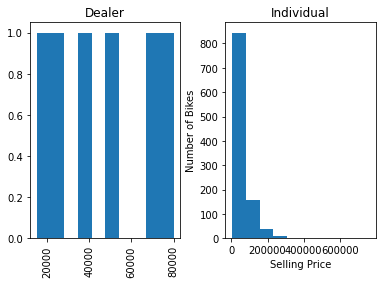

In [18]:
# Here we used bins = 10
bikedata.selling_price.hist(bins = 10, by = bikedata.seller_type)
# Create title and labels
plt.xticks(rotation = 0)
plt.xlabel("Selling Price")
plt.ylabel("Number of Bikes")
plt.show()
plt.close()

Lastly, we wanted to look at the one-way contingency tables for bike names, using the `.value_counts()` method to see the top 10 sellers.

In [19]:
# Our one-way table below shows the names of the bikes which were sold the most.
best_seller_bike_names = bikedata["name"].value_counts().head(10)
best_seller_bike_names

Bajaj Pulsar 150                 41
Royal Enfield Classic 350        27
Honda Activa [2000-2015]         23
Honda CB Hornet 160R             22
Bajaj Pulsar 180                 20
Royal Enfield Thunderbird 350    19
Hero Honda Splendor Plus         17
Bajaj Discover 125               16
Yamaha FZ S V 2.0                16
Honda Activa 3G                  15
Name: name, dtype: int64

## 2. Prediction of Selling Price Using Algorithms
### 2.1 Grid Search Algorithm
#### 2.1.1 Grid Search With Just the Selling Price Variable

We want to search a large amount of values to find the one that has the lowest error when predicting selling price.  We start by making our grid of values, by taking each integer from the first and third quartiles of selling_price, 28,000 and 70,000 respectively.  We expect the best prediction to be somewhere in the middle 50% of the data.

In [20]:
# Create Grid of c values. All values between the Q1 of selling price and Q3, 
# by intervals of 1. 28000 through 70000.
cgrid = [x for x in range(int(bikedata.selling_price.quantile(q = 0.25)),
                          int(bikedata.selling_price.quantile(q = 0.75)))]

We need to create a loss function using the selling_price variable and a prediction.

In [21]:
def sq_error_loss(y, c):
    loss = (y-c)**2
    return(loss)

We use that loss function to calculate the Root Mean Square Error (RMSE) to see the average error of our prediction.

In [22]:
import numpy as np
def RMSE(y, c):
    rmse = np.sqrt(np.mean(sq_error_loss(y, c)))
    return(rmse)

Next, we need to define a function for our grid search algorithm.  We will loop through each value in our grid and calculate its RMSE.  We will then find the prediction that has the lowest RMSE and say this is our optimal value.

In [23]:
# Create grid search algorithm that uses just the selling price.  
# Uses arguments y for variable to compare c to, and cgrid for grid of c values 
# to loop through.
def grid_search(y, cvals):
    # Create an empty list to store the RMSE values for each c value in.
    rmses = []
    # Loop through each value of c in the cvals.
    for i in cvals:
        # Append to the rmses list the computed value of RMSE for each 
        # corresponding c value
        rmses.append(RMSE(y, i))
    # Create a data frame with the values of c and their corresponding RMSEs 
    # zipped together
    df = pd.DataFrame(zip(cvals, rmses), columns = ["c", "rmse"])
    # Find the minimum value of RMSE in the df data frame
    minrmse = min(df.rmse)
    # Subset the data frame to contain only the rows where the minimum RMSE is, 
    # this gives the optimal value of c and its corresponding RMSE.
    optimalc = df[df.rmse == minrmse]
    # Return the row where the minimum RMSE is
    return(optimalc)

Here we are testing the algorithm on the selling price variable.  The optimal prediction value is $59,638 with an RMSE of 56,278.

In [24]:
grid_search(y = bikedata.selling_price, cvals = cgrid)

,c,rmse
31638,59638,56277.752122


We also need to test the algorithm on the km driven variable to make sure it generalizes. This returns an optimal prediction value of 34,360 km.

In [25]:
grid_search(y = bikedata.km_driven, cvals = cgrid)

,c,rmse
6360,34360,51598.819374


#### 2.1.2 Grid Search Algorithm with Another Numeric Variable

Now we want to incorporate a predictor into our algorithm.  In order to do this, we need to look at a linear combination of values.  In our example, we use the km_driven variable, but this can be done for any numeric variable to predict the selling price.  We start with generating a grid of intercept (b0) values, which is every integer from 60,000 to 70,000, and of slope (b1) values, which is every value from -1 to 1 by step 0.01.

In [26]:
# Create b0s using every integer from 60,000 to 70,000
b0s = [x for x in range(60000, 70001)]
# Create b1s using every number between -1 and 1 by steps of 0.01
b1s = [x/100 for x in range(-100, 101)]
# Make a list of pairs of b0s and b1s and call it grid2
grid2 = [ (i, j) for i in b0s for j in b1s ]

For this new algorithm, we need to loop through every possible combination of b0 and b1 values.  We calculate the prediction c1 from (b0 + b1***x**) for each combination.  Then we calculate the RMSE of that prediction.  Finally, we can find the values of b0 and b1 that give the lowest RMSE.  We also want to be able to predict the selling price of a bike from the amount of kilometers driven on it.

In [27]:
# Create a new grid search algorithm that uses the combinations of b0 and b1 to 
# predict selling price. x is numeric predictor, y is real responses
# and grid is dataframe of numbers to search through, also add optional numeric 
# predictor x
def new_grid_search(x, y, grid, predictor = False):
    # Initialize the rmses list
    rmses = []
    results = []
    # Start looping through each pair of combinations of the columns of the grid.
    for i, j in grid:
        # For each combinations, use the linear combination of i + jx to find c, 
        # which we then find the RMSE of, append each RMSE to the list.
        c = i + (j * x)
        rmses.append(RMSE(y, c))
    # Take our list of RMSEs and zip it with each combination and create a data frame.
    df = pd.DataFrame(zip(grid, rmses), columns = ["b0b1", "rmse"])
    # Find the minimum RMSE
    minrmse = min(df.rmse)
    # Find which index of RMSE corresponds to the minimum, then subset to just that 
    # observation and call it optimalb0b1
    optimalb0b1 = df[df.rmse == minrmse]
    # Check if an optional numeric predictor x was given
    if predictor != False:
        # Grab the optimal b0 value
        b0 = optimalb0b1.iloc[:, 0].iloc[0][0]
        # Grab the optimal b1 value
        b1 = optimalb0b1.iloc[:, 0].iloc[0][1]
        # Grab the rmse from the optimal b0 and b1 values
        rmse = optimalb0b1.iloc[:, 1].iloc[0]
        # Calculate the prediction c from the linear combination of b0 + b1*predictor
        c = b0 + (b1*predictor)
        # Create a series of the values b0, b1, rmse, and c and call it "results"
        results = pd.Series([b0, b1, rmse, c], name = "results")
        # Convert the results to a data frame
        resultsdf = pd.DataFrame([results])
        # Rename the columns of the data frame to be informative
        resultsdf.columns = ["b0", "b1", "rmse", "prediction"]
        # Return the formatted data frame of results
        return(resultsdf)
    # If no predictor was given, return just the optimal b0 and b1 and its RMSE
    else:
        return(optimalb0b1)

After running our algorithm, the best combination when using km_driven to predict the selling price is when b0 is 67541 and b1 is -0.23. The RMSE of this prediction is 54987.2.

In [28]:
new_grid_search(x = bikedata.km_driven, y = bikedata.selling_price, grid = grid2)

,b0b1,rmse
1515818,"(67541, -0.23)",54987.199961


We can use these b0 and b1 values to predict the selling_price of a bike with 10,000 km driven. This prediction comes out to $65,241.


In [29]:
new_grid_search(x = bikedata.km_driven, y = bikedata.selling_price, 
                grid = grid2, predictor = 10000)

,b0,b1,rmse,prediction
results,67541.0,-0.23,54987.199961,65241.0


Next we can predict the selling_price of a bike with 25,000 km driven. This prediction comes out to $61,791.

In [30]:
new_grid_search(x = bikedata.km_driven, y = bikedata.selling_price,
                grid = grid2, predictor = 25000)

,b0,b1,rmse,prediction
results,67541.0,-0.23,54987.199961,61791.0


Lastly we can predict the selling_price of a bike with 35,000 km driven. This prediction comes out to $59,491. It is encouraging to see that the predicted price goes down the more miles there are on the bike as this matches intuition.

In [31]:
new_grid_search(x = bikedata.km_driven, y = bikedata.selling_price,
                grid = grid2, predictor = 35000)

,b0,b1,rmse,prediction
results,67541.0,-0.23,54987.199961,59491.0


### 2.2 Gradient Descent Algorithm
#### 2.2.1 Gradient Descent Algorithm with Just the Selling Price

We use the gradient descent algorithm to approximate the prediction that will minimize the RMSE function.  The idea comes from calculus, where we measure the derivative of RMSE at a given prediction c.  Then we check the sign of our derivative and increase our prediction if the derivative is negative, decrease our prediction if the derivative is positive, repeating our algorithm until our process is as close as possible to zero.  This should yield to value that minimizes our error and therefore is the best prediction value c.

We create the same loss function as before, using the data and a prediction c.

In [32]:
def sq_error_loss(y, c):
    loss = (y-c)**2
    return(loss)

Next we use the loss function to calculate the RMSE of a prediction c.

In [33]:
import numpy as np
def RMSE(y, c):
    rmse = np.sqrt(np.mean(sq_error_loss(y, c)))
    return(rmse)

We can then use the `diff_quo()` function to calculate the derivative of RMSE at a prediction c, with a small increment d.

In [34]:
def diff_quo(y, c, d):
    dq = (RMSE(y = y, c = c+d) - RMSE(y = y, c = c))/(d)
    return(dq)

Define our gradient descent function below.  We want to calculate the RMSE derivative at a first value of c, then update that value with a step size.  The new c will be the current c minus the product of the derivative and that step size.  Then we check if the distance is above a tolerance that is close to 0.  If it is above the tolerance, we update the current c with the new c value and try again up to a million times, after which the loop will stop even if the condition was not met.  If we get a c value below the tolerance, we update to that c value and stop.  We then return that c value and its RMSE.

In [35]:
# Gradient descent function should only need the y values and an initial c value
def gradient_descent(y, c, d):
    # Constant Variables include step_size, num_tol
    step_size = 0.5
    num_tol = 0.01
    # Set first value of c
    cur_c = c
    # Find first difference quotient
    diff_quotient = diff_quo(y = y, c = c, d = d)
    # Find first new_c
    new_c = cur_c - (diff_quotient * step_size)
    # Check if abs(new_c - cur_c) is larger than the tolerance
    if abs(new_c - cur_c) >= num_tol:
            # Since we exceeded the tolerance, we updated the c value and continue on
            cur_c = new_c
            # Start a loop that will replace c values up to a million times, 
            # continue to check like before
            for i in range(1000000):
                # Calculate difference quotient using new_c, which is now the cur_c
                diff_quotient = diff_quo(y = y, c = cur_c, d = d)
                # Calculate the next new_c
                new_c = cur_c - (diff_quotient * step_size)
                # Check again if we are above the tolerance, if so, update the c value 
                # and run it again
                if abs(new_c - cur_c) >= num_tol:
                    cur_c = new_c
                # If we have found a c that satisfies the tolerance, update to that 
                # value of c
                else:
                    cur_c = new_c
                    # Find the RMSE of the c that minimizes RMSE
                    rmse_c = RMSE(y = y, c = cur_c)
                    # Create a series of the c value and its RMSE
                    results = pd.Series([cur_c, rmse_c], name = "results")
                    # Convert the results to a data frame
                    resultsdf = pd.DataFrame([results])
                    # Rename the columns of the data frame to be informative
                    resultsdf.columns = ["c", "rmse"]
                    # Return the formatted data frame of results
                    return(resultsdf)
    # If first iteration of abs(new_c - cur_c) is smaller than tolerance, update to 
    # that value of c
    else:
        cur_c = new_c
        # Find the RMSE of the c that minimizes RMSE
        rmse_c = RMSE(y = y, c = cur_c)
        # Create a series of the c value and its RMSE
        results = pd.Series([cur_c, rmse_c], name = "results")
        # Convert the results to a data frame
        resultsdf = pd.DataFrame([results])
        # Rename the columns of the data frame to be informative
        resultsdf.columns = ["c", "rmse"]
        # Return the formatted data frame of results
        return(resultsdf)

Testing our algorithm to find the prediction value c that optimizes the selling price variable, with an initial value of 50000 and a delta of 0.005. This returns a value of c that is $58512.39.

In [36]:
gradient_descent(y = bikedata.selling_price, c = 50000, d = 0.005)

,c,rmse
results,58512.387901,56289.010722


Next we make sure our algorithm generalizes by optimizing the km driven variable, with an initial guess of 50000 and a delta of 0.005. This returns a value of c that is 35,392 kilometers.

In [37]:
gradient_descent(y = bikedata.km_driven, c = 50000, d = 0.005)

,c,rmse
results,35392.000107,51609.141916


#### 2.2.2 Gradient Descent Algorithm with Another Numeric Variable

We use the gradient descent algorithm to approximate the prediction that will minimize the RMSE function when we have a predictor x.  In our example we use km driven for x. We can make a prediction c from a linear combination from our x values.  We calculate the prediction c from an intercept (b0) and slope (b1).  We try to minimize the RMSE function using the derivatives with respect to b0 and b1, separately.

We need a new loss function for b0 and b1 using the numerical variables x and y from our data set.

In [38]:
def multi_sq_error_loss(x, y, b0, b1):
    loss = (y-b0-((b1)*(x)))**2
    return(loss)

Now we need a new RMSE function, which uses b0, b1, x, and y.

In [39]:
def multi_RMSE(x, y, b0, b1):
    rmse = np.sqrt(np.mean(multi_sq_error_loss(x, y, b0, b1)))
    return(rmse)

Next we create a derivative function by calculating the difference quotient of RMSE with respect to b0 using a small increment d0.  We are using x and y as well.

In [40]:
def diff_quotient_b0(x, y, b0, b1, d0):
    dq0 = (multi_RMSE(x = x, y = y, b0 = b0 + d0, b1 = b1) - multi_RMSE(x = x, y = y, b0 = b0, b1 = b1))/(d0)
    return(dq0)

Next we create a derivative function by calculating the difference quotient of RMSE with respect to b1 using a small increment d1.  We are using x and y as well.

In [41]:
def diff_quotient_b1(x, y, b0, b1, d1):
    dq1 = (multi_RMSE(x = x, y = y, b0 = b0, b1 = b1 + d1) - multi_RMSE(x = x, y = y, b0 = b0, b1 = b1))/(d1)
    return(dq1)

Define our gradient descent algorithm that takes in a predictor variable x, numeric variable y, initial values of b0 and b1, and increment value of d0 and d1 for difference quotients diff_quo_b0 and diff_quo_b1.  Also specify an optional argument for predictions.  We set b0 and b1 to be cur_b0 and cur_b1.  Then we evaluate the diff_quo_b0 at (cur_b0, cur_b1) then create a new_b0, which is the cur_b0 minus the product of a step size and diff_quo_b0 (cur_b0, cur_b1).  Then we evaluate the diff_quo_b1 at (new_b0, cur_b1) then create a new_b1, which is the cur_b1 minus the product of a step size and diff_quo_b1 (new_b0, cur_b1).  Check if the Euclidean Distance between (cur_b0, cur_b1) and (new_b0, new_b1) to see if it is below a certain tolerance that is close to 0.  If we are above the tolerance, we update cur_b0 and cur_b1 then repeat the process again up to a million times and stop after that even if the condition wasn't met.  If we are below the tolerance, we update cur_b0 and cur_b1 and return their values and their RMSE.  If a prediction was requested, we can take in a value and use a linear combination with b0 and b1 to find the prediction.

In [42]:
import math
# Define the gradient descent algorithm with predictor x, allow for option prediction 
# at the end based on a predictor
def multi_gradient_descent(x, y, b0, b1, d0, d1, predictor = False):
    # Constant Variables include step_sizes, num_tol
    b0_step_size = 1.0
    b1_step_size = 0.000005
    num_tol = 0.01
    # Set first value of b0 and b1
    cur_b0 = b0
    cur_b1 = b1
    # Find first b0 difference quotient
    diff_quo_b0 = diff_quotient_b0(x = x, y = y, b0 = b0, b1 = b1, d0 = d0)
    # Find first new_b0
    new_b0 = cur_b0 - (diff_quo_b0 * b0_step_size)
    # Find first b1 difference quotient
    diff_quo_b1 = diff_quotient_b1(x = x, y = y, b0 = new_b0, b1 = b1, d1 = d1)
    # Find first new_b1
    new_b1 = cur_b1 - (diff_quo_b1 * b1_step_size)
    # Check if Euclidean Distance of new b0, b1 and old b0, b1 is larger than the tolerance
    if math.dist((new_b0, new_b1), (cur_b0, cur_b1)) >= num_tol:
        # Since we exceeded the tolerance, we update the b0 and b1 values and continue on
        cur_b0 = new_b0
        cur_b1 = new_b1
        # Start looping through values of b0 and b1 until we find one that satisfies the tolerance
        for i in range(1000000):
            # Find next b0 difference quotient
            diff_quo_b0 = diff_quotient_b0(x = x, y = y, b0 = cur_b0, b1 = cur_b1, d0 = d0)
            # Find next new_b0
            new_b0 = cur_b0 - (diff_quo_b0 * b0_step_size)
            # Find next b1 difference quotient
            diff_quo_b1 = diff_quotient_b1(x = x, y = y, b0 = new_b0, b1 = cur_b1, d1 = d1)
            # Find next new_b1
            new_b1 = cur_b1 - (diff_quo_b1 * b1_step_size)
            # Check if Euclidean Distance of new b0, b1 and old b0, b1 is larger than tolerance
            if math.dist((new_b0, new_b1), (cur_b0, cur_b1)) >= num_tol:
                # Since we exceeded the tolerance, we update the b0 and b1 values and continue on
                cur_b0 = new_b0
                cur_b1 = new_b1
            # Check if Euclidean Distance of new b0, b1 and old b0, b1 is smaller than tolerance
            else:
                # Since it is below the tolerance, update b0 and b1
                cur_b0 = new_b0
                cur_b1 = new_b1
                # Check if a prediction was requested then:
                if predictor != False:
                    # Calculate the prediction c from the linear combination of b0 + b1*predictor
                    c = cur_b0 + (cur_b1*predictor)
                    # Calculate the rmse of b0 and b1
                    rmse = multi_RMSE(x = x, y = y, b0 = cur_b0, b1 = cur_b1)
                    # Create a series of the values b0, b1, rmse, and prediction c and call it "results"
                    results = pd.Series([cur_b0, cur_b1, rmse, c], name = "results")
                    # Convert the results to a data frame
                    resultsdf = pd.DataFrame([results])
                    # Rename the columns of the data frame to be informative
                    resultsdf.columns = ["b0", "b1", "rmse", "prediction"]
                    # Return the formatted data frame of results
                    return(resultsdf)
                # If prediction was not requested then:
                else:
                    # Calculate the rmse of b0 and b1
                    rmse = multi_RMSE(x = x, y = y, b0 = cur_b0, b1 = cur_b1)
                    # Create a series of the values b0, b1, rmse and call it "results"
                    results = pd.Series([cur_b0, cur_b1, rmse], name = "results")
                    # Convert the results to a data frame
                    resultsdf = pd.DataFrame([results])
                    # Rename the columns of the data frame to be informative
                    resultsdf.columns = ["b0", "b1", "rmse"]
                    # Return the formatted data frame of results
                    return(resultsdf)
    # If Euclidean Distance of new b0, b1 and old b0, b1 is smaller than tolerance, update the value of b0, b1
    else:
        cur_b0 = new_b0
        cur_b1 = new_b1
        if predictor != False:
            # Calculate the prediction c from the linear combination of b0 + b1*predictor
            c = cur_b0 + (cur_b1*predictor)
            # Calculate the rmse of b0 and b1
            rmse = multi_RMSE(x = x, y = y, b0 = cur_b0, b1 = cur_b1)
            # Create a series of the values b0, b1, rmse, and prediction c and call it "results"
            results = pd.Series([cur_b0, cur_b1, rmse, c], name = "results")
            # Convert the results to a data frame
            resultsdf = pd.DataFrame([results])
            # Rename the columns of the data frame to be informative
            resultsdf.columns = ["b0", "b1", "rmse", "prediction"]
            # Return the formatted data frame of results
            return(resultsdf)
        else:
            # Calculate the rmse of b0 and b1
            rmse = multi_RMSE(x = x, y = y, b0 = cur_b0, b1 = cur_b1)
            # Create a series of the values b0, b1, rmse and call it "results"
            results = pd.Series([cur_b0, cur_b1, rmse], name = "results")
            # Convert the results to a data frame
            resultsdf = pd.DataFrame([results])
            # Rename the columns of the data frame to be informative
            resultsdf.columns = ["b0", "b1", "rmse"]
            # Return the formatted data frame of results
            return(resultsdf)

Testing the algorithm to find the optimal values of b0 and b1 for selling_price as the response and km_driven as our predictor, with deltas of 0.005.  This returns 66948.32 for b0 and -0.229 for b1 with an RMSE of 54,990.

In [43]:
multi_gradient_descent(x = bikedata.km_driven, y = bikedata.selling_price, 
                       b0 = 60000, b1 = 0, d0 = 0.005, d1 = 0.005)

,b0,b1,rmse
results,66948.322906,-0.228757,54990.121953


Use our values of b0 and b1 to predict the selling_price of a bike with 10,000 km driven. This comes out to $64,660.75.

In [44]:
multi_gradient_descent(x = bikedata.km_driven, y = bikedata.selling_price,
                       b0 = 60000, b1 = 0, d0 = 0.005, d1 = 0.005, predictor = 10000)

,b0,b1,rmse,prediction
results,66948.322906,-0.228757,54990.121953,64660.749445


Use our values of b0 and b1 to predict the selling_price of a bike with 25,000 km driven. This comes out to $61,229.39.

In [45]:
multi_gradient_descent(x = bikedata.km_driven, y = bikedata.selling_price, 
                       b0 = 60000, b1 = 0, d0 = 0.005, d1 = 0.005, predictor = 25000)

,b0,b1,rmse,prediction
results,66948.322906,-0.228757,54990.121953,61229.389252


Use our values of b0 and b1 to predict the selling_price of a bike with 35,000 km driven. This comes out to $58,941.82.

In [46]:
multi_gradient_descent(x = bikedata.km_driven, y = bikedata.selling_price, 
                       b0 = 60000, b1 = 0, d0 = 0.005, d1 = 0.005, predictor = 35000)

,b0,b1,rmse,prediction
results,66948.322906,-0.228757,54990.121953,58941.815791


Again it is encouraging to see that the selling price goes down as the km driven goes up.  Using selling price as our y value and km driven as our x value, we can compare the RMSEs of both algorithms.  The RMSE of the grid search algorithm was 54,987.2 while the RMSE of the gradient descent was 54,990.1.  These are pretty close, and it would be hard to choose between them, but based on the amount of time it takes to run, the gradient descent algorithm is better.